# Trenowanie modelu

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Użyłem architektury takiej jak na rysunku. Wszystkie warstwy Conv2d mają kernel=3, oraz padding=1. Po każdej warstwie Conv2d jest BatchNorm i ReLU (w tej kolejności), poza ostatnią wartswą, po której jest sigmoid.

Wszystkie wartswy ConvTranspose2d mają kernel_size=3, stride=2, padding=1, output_padding=1.

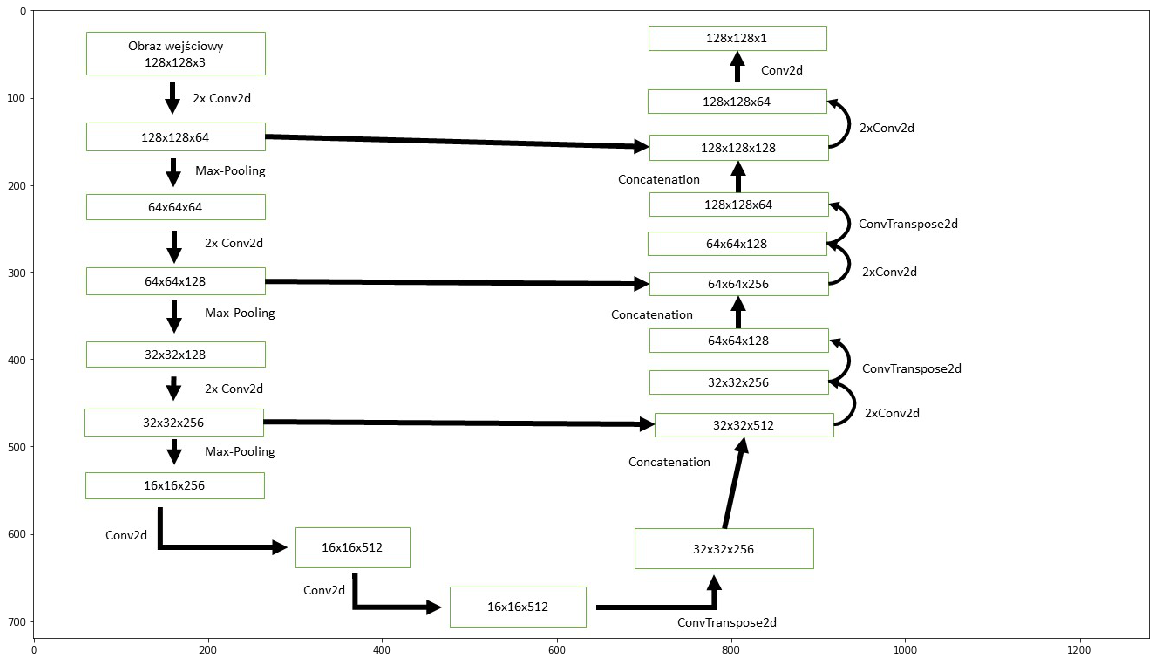

In [98]:
#img = np.load('C:/Users/Piotr Grabysz/Documents/Python Scripts/GSN/Projekt2/home/UnetArchitecture.jpg')
img = plt.imread('C:/Users/Piotr Grabysz/Documents/Python Scripts/GSN/Projekt2/home/UnetArchitecture.jpg')
_, ax = plt.subplots(figsize = (20,20))
ax.imshow(img)
plt.show()

Przetestowałem dwa optimizery: Adam z learning rate 0.001 oraz SGD z learning rate 0.001 i momentum=0.99. Używałem batch_size = 50, oraz losowe poziome symetrie i obroty o 90 i 270 stopni.

Na wykresach pokazuje błąd mierzony na zbiorze testowym bez oraz z self-augmentacją danych, żeby sprawdzić, czy self-augmentacja rzeczywiście pomaga. Okazuje się, że tak - błąd predykcji opartej o self-augmentację ma mniejszą wariancję i jest mniejszy niż bez augmentacji.
Na wykresach prezentuje też accuracy oraz intersection over union.

Sieć była trenowana przez 30 epoch. Pod koniec treningu udało mi się uzyskać accuracy nieco ponad 90%, ale ponieważ błąd na zbiorze testowym zdaje się cały czas maleć (nie ma overfittingu), to postanowiłem dotrenować sieć przez następne 30 epoch, z learning rate zmiejszonym do 0.0001, optimizer = Adam. W ten sposób udało mi się osiągnąć sieć z accuracy 92.8%.

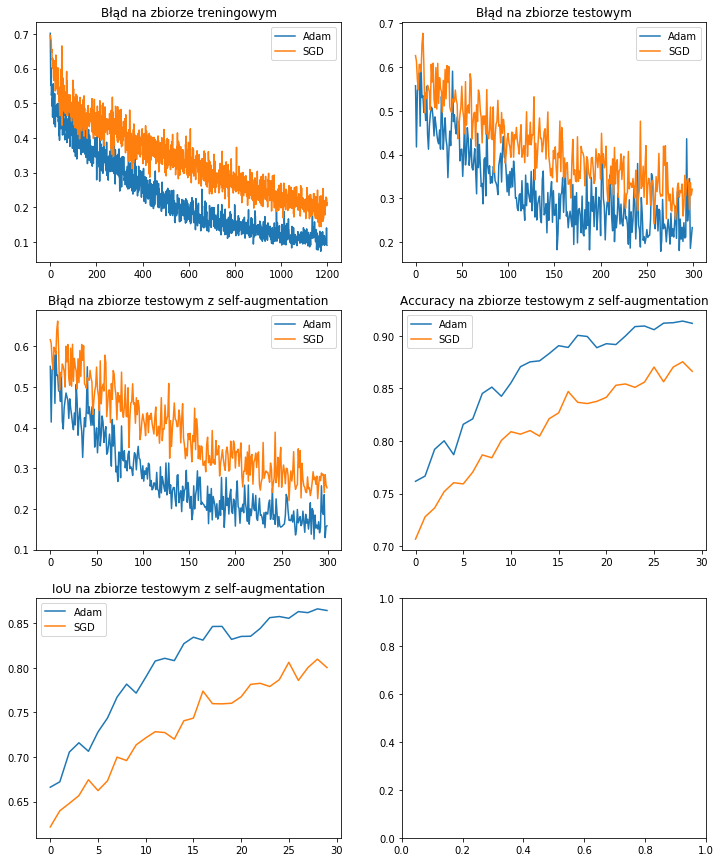

In [79]:
path = 'C:/Users/Piotr Grabysz/Documents/Python Scripts/GSN/Projekt2/results/pgrabysz/'
fig, ax = plt.subplots(3,2, figsize = (12,15))
train_loss1 = np.load(path+'train_loss_Adam_lr=0.001_30_epoch.npy') 
train_loss2 = np.load(path+'train_loss_SGD_lr=0.001_momentum=0.99_30_epoch.npy')
ax[0,0].plot(train_loss1, label = 'Adam')
ax[0,0].plot(train_loss2, label = 'SGD')
ax[0,0].set_title("Błąd na zbiorze treningowym")
ax[0,0].legend()

test_loss1 = np.load(path+'test_loss_Adam_lr=0.001_30_epoch.npy') 
test_loss2 = np.load(path+'test_loss_SGD_lr=0.001_momentum=0.99_30_epoch.npy')
ax[0,1].plot(test_loss1, label = 'Adam')
ax[0,1].plot(test_loss2, label = 'SGD')
ax[0,1].set_title("Błąd na zbiorze testowym")
ax[0,1].legend()

test_loss3 = np.load(path+'test_loss_aug_Adam_lr=0.001_30_epoch.npy') 
test_loss4 = np.load(path+'test_loss_aug_SGD_lr=0.001_momentum=0.99_30_epoch.npy') 
ax[1,0].plot(test_loss3, label = 'Adam')
ax[1,0].plot(test_loss4, label = 'SGD')
ax[1,0].set_title("Błąd na zbiorze testowym z self-augmentation")
ax[1,0].legend()

test_acc1 = np.load(path+'test_acc_Adam_lr=0.001_30_epoch.npy') 
test_acc2 = np.load(path+'test_acc_SGD_lr=0.001_momentum=0.99_30_epoch.npy') 
ax[1,1].plot(test_acc1, label = 'Adam')
ax[1,1].plot(test_acc2, label = 'SGD')
ax[1,1].set_title("Accuracy na zbiorze testowym z self-augmentation")
ax[1,1].legend()

IoU1 = np.load(path+'IoU_metric_Adam_lr=0.001_30_epoch.npy') 
IoU2 = np.load(path+'IoU_metric_SGD_lr=0.001_momentum=0.99_30_epoch.npy') 
ax[2,0].plot(IoU1, label = 'Adam')
ax[2,0].plot(IoU2, label = 'SGD')
ax[2,0].set_title("IoU na zbiorze testowym z self-augmentation")
ax[2,0].legend()

plt.show()


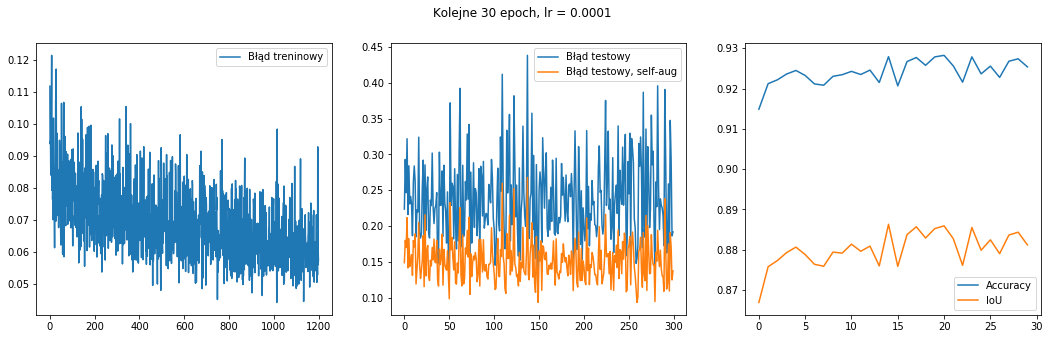

In [89]:
fig, ax = plt.subplots(1,3, figsize = (18,5))
train_loss = np.load(path+'train_loss_Adam_lr=0.0001_next_30_epoch.npy') 
ax[0].plot(train_loss, label = 'Błąd treninowy')
ax[0].legend()

test_loss = np.load(path+'test_loss_Adam_lr=0.0001_next_30_epoch.npy')
test_loss2 = np.load(path+'test_loss_aug_Adam_lr=0.0001_next_30_epoch.npy')
ax[1].plot(test_loss, label = 'Błąd testowy')
ax[1].plot(test_loss2, label = 'Błąd testowy, self-aug')
ax[1].legend()

test_acc = np.load(path+'test_acc_Adam_lr=0.0001_next_30_epoch.npy')
IoU = np.load(path+'IoU_metric_Adam_lr=0.0001_next_30_epoch.npy')
ax[2].plot(test_acc, label = 'Accuracy')
ax[2].plot(IoU, label = 'IoU')
ax[2].legend()

fig.suptitle('Kolejne 30 epoch, lr = 0.0001')
plt.show()

# Analiza modelu

In [45]:
def show(index, images, masks, preds):
    fig, ax = plt.subplots(1,3)
    ax[0].imshow(images[index,:])
    ax[1].imshow(masks[index,:,:,0])
    ax[2].imshow(preds[index,:,:,0])
    fig.suptitle("Loss: {:}".format(losses[index]))

In [7]:
images = np.load('C:/Users/Piotr Grabysz/Documents/Python Scripts\GSN/Projekt2/results/pgrabysz/images.npy')
preds = np.load('C:/Users/Piotr Grabysz/Documents/Python Scripts\GSN/Projekt2/results/pgrabysz/preds.npy')
masks = np.load('C:/Users/Piotr Grabysz/Documents/Python Scripts\GSN/Projekt2/results/pgrabysz/masks.npy')
losses = np.load('C:/Users/Piotr Grabysz/Documents/Python Scripts\GSN/Projekt2/results/pgrabysz/losses.npy')

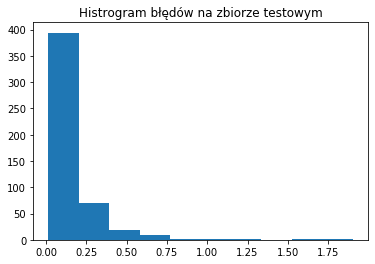

In [55]:
plt.hist(losses)
plt.title('Histrogram błędów na zbiorze testowym')
plt.show()

Na poniższych wykresach przedstawiam, jak wyglądają zdjęcia, odpowiadające im maski oraz predykcje dla zdjęć o błędzie większym niż 0.75 (takich przykładów jest w biorze testowym 9).

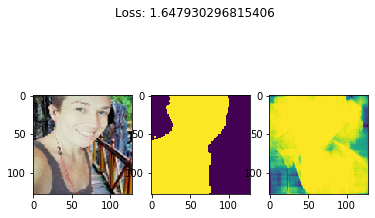

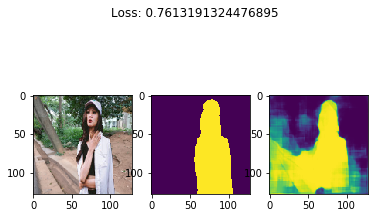

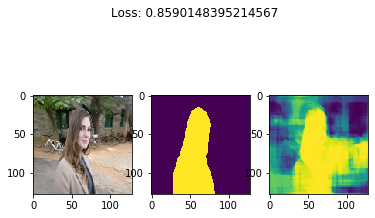

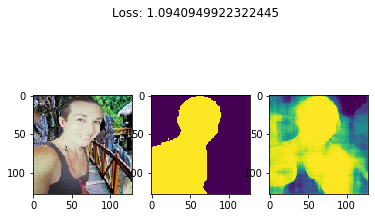

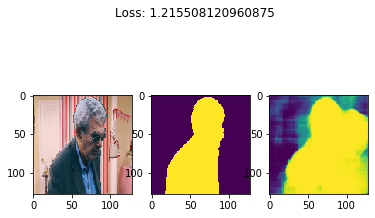

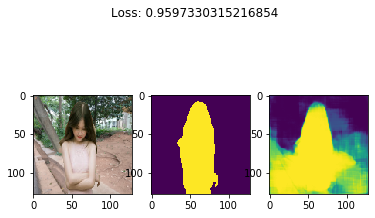

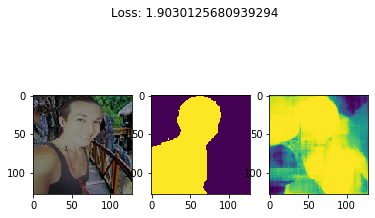

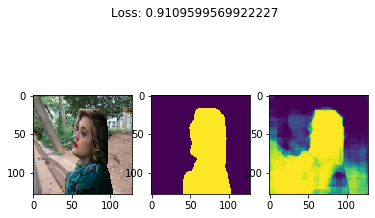

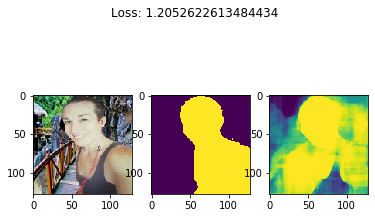

In [57]:
idx_with_high_loss = np.where(losses >0.75)[0]
for i in range(idx_with_high_loss.shape[0]):
    show(idx_with_high_loss[i], images, masks, preds)
    

Niestety, nie jest mi łatwo powiedzieć, czym różnią te zdjęcia od takich, dla których błąd był mały. Postaci na drugim, piątym i ósmym zdjęciu są umiejsciowione na tym samym tle, a tło na zdjęciu trzecim jest do nich zbliżone kolorystycznie. Być może problemem było to, że kolory tła są na tych zdjęciach nieco podobne do odcieni ludzkiej skóry.
Można również zauważyć, że w te błędnych predykcje dość dobrze pokrywają się z maską w miejscach, gdzie faktycznie znajduje się postać, ale jest też dużo dodatkowych pikseli w miejscach, gdzie powinno być tło. Można powiedzieć, że te zdjęcia mają wysoki False Positive Rate.

Na poniższych obrazach przedstawiłem False Positive Rate, True Positive Rate oraz entropię policzone dla każdego piksela osobno. Wszystkie trzy wizualizację zdają się obrysowywać kształt człowieka (głowa plus kawałek klatki pierwsiowej). Z tych wizualizacji można wywnioskować, że:
 - najwięcej false positive było w dolnych częściach zdjęć
 - najlepsze predykcje były dla obiektów umieszczonych w centrum zdjęcia (drugi wykres)
 - sieć robi podobne predykcje dla pikseli z centrum obrazu oraz w lewym górnym i prawym górnym rogu. Zółty pas to obszar o największej entropii, czyli miejsca gdzie predykcje sieci były najbardziej różnorodne (trzeci wykres) 

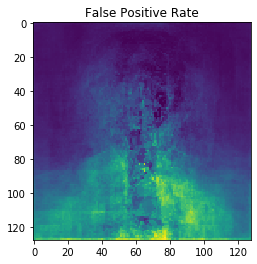

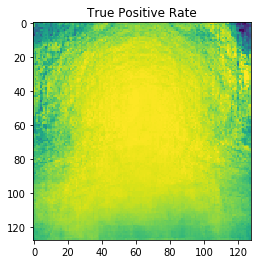

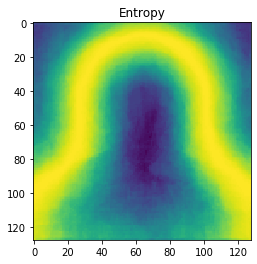

In [53]:
final_preds = (preds >= 0.5)
number_of_false_positives = np.sum(np.logical_and(final_preds==1, masks==0), axis = 0)
number_of_negatives = np.sum(masks==0, axis = 0)
FalsePositiveRate = number_of_false_positives/number_of_negatives
plt.imshow(FalsePositiveRate[:,:,0])
plt.title('False Positive Rate')
plt.show()

number_of_true_positives = np.sum(np.logical_and(final_preds==1, masks==1), axis = 0)
number_of_negatives = np.sum(masks==1, axis = 0)
TruePositiveRate = number_of_true_positives/number_of_negatives
plt.imshow(TruePositiveRate[:,:,0])
plt.title('True Positive Rate')
plt.show()

p = np.sum(final_preds, axis = 0)/final_preds.shape[0]
entropy = -p*np.log(p) - (1-p)*np.log(1-p)
plt.imshow(entropy[:,:,0])
plt.title('Entropy')
plt.show()